In [246]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [247]:
img = cv2.imread('./real_life.png')#[...,::-1]
# img = cv2.imread('./real_life.png')#[...,::-1]

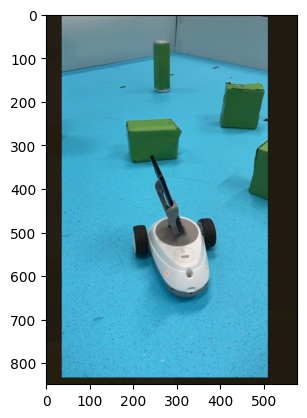

In [248]:
plt.imshow(img)

In [249]:
# Convert the image to HSV color space (Hue, Saturation, Value)
hsv_image = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# Define the color ranges for green, yellow, and white in HSV
lower_green = np.array([40, 40, 40])
upper_green = np.array([80, 255, 255])

lower_yellow = np.array([20, 100, 100])
upper_yellow = np.array([30, 255, 255])

lower_white = np.array([0, 0, 128])
upper_white = np.array([255, 30, 255])

# Create masks for each color
mask_green = cv2.inRange(hsv_image, lower_green, upper_green)
mask_yellow = cv2.inRange(hsv_image, lower_yellow, upper_yellow)
mask_white = cv2.inRange(hsv_image, lower_white, upper_white)

# Set the corresponding color values for each mask
img[mask_green > 0] = [0, 255, 0]       # Green cubes
img[mask_yellow > 0] = [0, 0, 0]      # Yellow floor
img[mask_white > 0] = [255, 255, 255]   # White walls

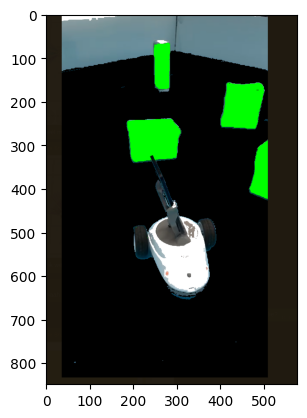

In [250]:
plt.imshow(img)

In [251]:
# Create a mask for the green color
mask_green = cv2.inRange(hsv_image, lower_green, upper_green)

# Find contours in the mask
contours, _ = cv2.findContours(mask_green, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
points = []
# Draw contours on the original image and calculate centroids
for contour in contours:
    # Calculate the centroid of the contour
    M = cv2.moments(contour)
    if M["m00"] != 0:
        cx = int(M["m10"] / M["m00"])
        cy = int(M["m01"] / M["m00"])

        points.append([cx,cy])
        # Draw the centroid on the image
        cv2.circle(img, (cx, cy), 5, (255, 0, 0), -1)  # Red circle

        # Print the centroid coordinates
        print(f"Green region at ({cx}, {cy})")


Green region at (491, 363)
Green region at (245, 287)
Green region at (449, 209)
Green region at (265, 117)


In [252]:
width = 640
height = 480
center_point = [width//2, height//2]

In [253]:
import random
print(-(random.random()*1.6)-0.8, (random.random()*1.6)-0.048, 0.03)

-2.133313582306629 0.9746307006403641 0.03
